In [1]:
"""P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib"""





'P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. \n  Modeling wine preferences by data mining from physicochemical properties.\n  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.\n\n  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016\n                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf\n                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib'

In [2]:
# Importing the needed modules

import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
sns.set()

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

# Data Cleaning

In [3]:
# Read the data into a panda dataframe

reddf = pd.read_csv('winequality-red.csv') 

In [4]:
reddf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# View information of about the contents of the data

reddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Check out the first five contents of the the dataframe to get a sense of what it looks like

reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Feature Creation

In [7]:
# adding a new output column into the dataset that shows whether the wine is good or not(1 or 0)
# quality value that is greater than 6.5 suggests that the wine is of good quality

def assign(x):
    if x < 6.5:
        return 0
    else:
        return 1
        

reddf['verdict'] = reddf['quality'].apply(assign)

In [8]:
reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [9]:
reddf.shape

(1599, 13)

In [10]:
# checking the dataset distrubution

distinct = reddf.groupby('quality')
distinct.size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [11]:
status = reddf.groupby('verdict')
status.size()

verdict
0    1382
1     217
dtype: int64

In [12]:
# We have 1599 wine samples and 11 input features and one output feature
# The dataset is imbalanced which means we have an Imbalanced classification problem on our hands
# we have a single output column with more 2 target cardinality or variables so it is a Multiclass Classification problem
# figure out the next step of action
# Data Cleaning
# Check for the existense of null values

print(len(reddf))

reddf.isna().sum()

1599


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
verdict                 0
dtype: int64

# Data Exploration and Visualization

In [13]:
reddf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [14]:
reddf.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


In [15]:
reddf.iloc[:, 0:12].corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [16]:
reddf.iloc[:, 0:13].corr()['verdict']

fixed acidity           0.120061
volatile acidity       -0.270712
citric acid             0.214716
residual sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
quality                 0.710196
verdict                 1.000000
Name: verdict, dtype: float64

In [17]:
pd.DataFrame({'mean': reddf.mean(), 'variance': reddf.var()}, index=reddf.columns[0:11])

,mean,variance
fixed acidity,8.319637,3.031416
volatile acidity,0.527821,0.032062
citric acid,0.270976,0.037947
residual sugar,2.538806,1.987897
chlorides,0.087467,0.002215
free sulfur dioxide,15.874922,109.414884
total sulfur dioxide,46.467792,1082.102373
density,0.996747,0.000004
pH,3.311113,0.023835
sulphates,0.658149,0.028733


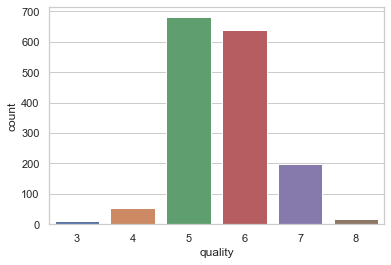

In [18]:
# plot a countplot
sns.set(style='whitegrid')
sns.countplot(reddf['quality'], label='Count')

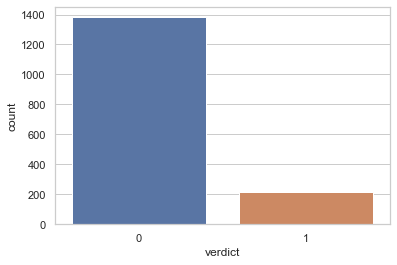

In [19]:
sns.set(style='whitegrid')
sns.countplot(reddf['verdict'], label='Count')

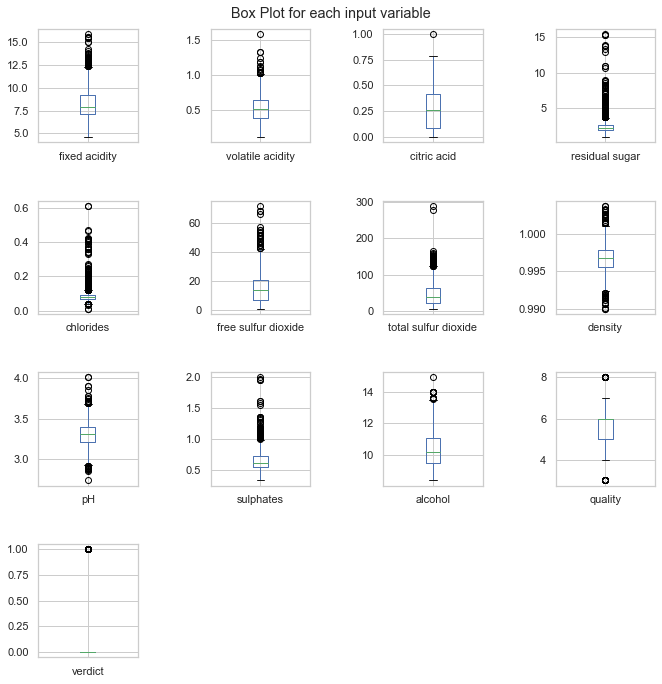

In [20]:
reddf.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey = False, figsize=(10,10),
           title= 'Box Plot for each input variable')
plt.savefig('Wine_box')
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)
plt.show()


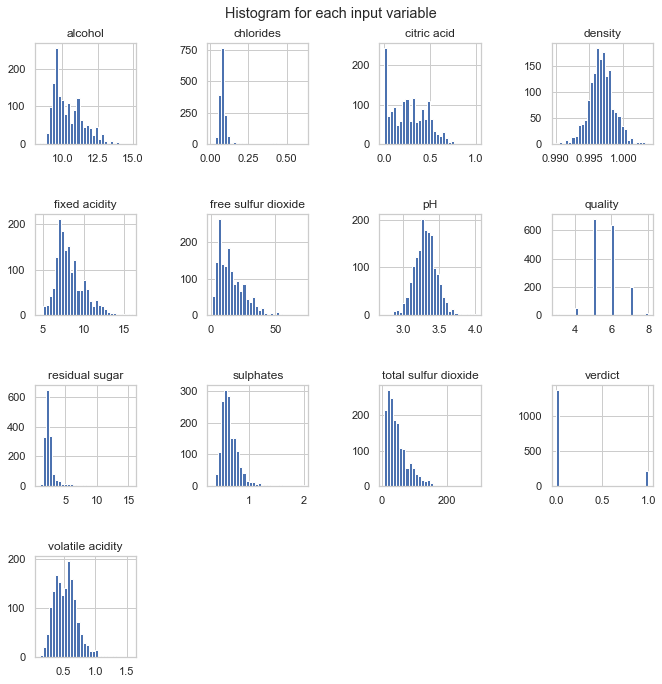

In [21]:
# histogram
reddf.hist(bins=30, figsize=(10,10))

pl.suptitle('Histogram for each input variable')
plt.savefig('Wine_hist')
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)
plt.show()

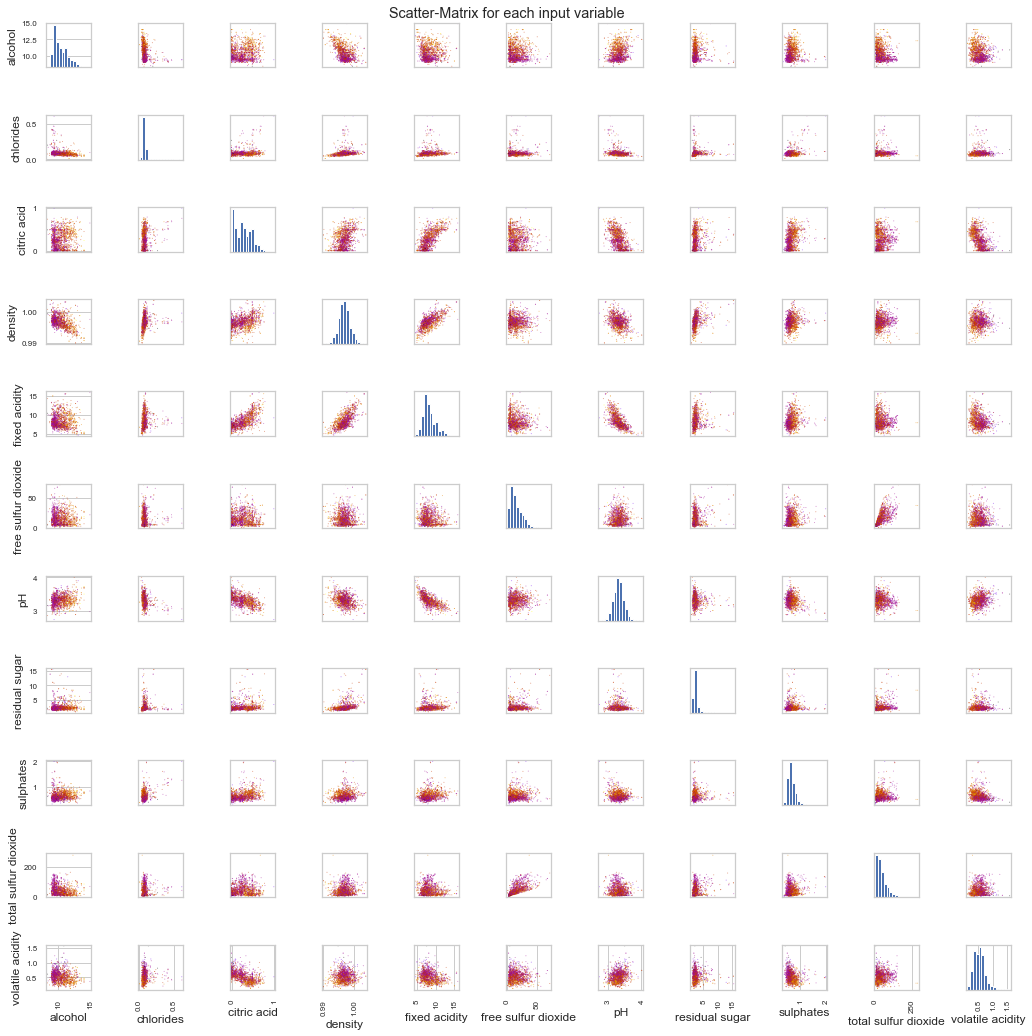

In [22]:
# From above we can see some correlations between features eg density and fixed acidity, alcohol and density
# Checking individual feature correlations
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide',
                 'pH', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity']

X = reddf[feature_names]
Y = reddf['quality']

cmap = cm.get_cmap('gnuplot')

scatter_matrix(X, c=Y, marker='o', s=1, hist_kwds={'bins': 15}, figsize=(15, 15), cmap=cmap)
plt.suptitle('Scatter-Matrix for each input variable')
plt.tight_layout(pad=3.0)
plt.savefig('Wine_scatter_matrix')

In [23]:
# since data quality with the value of greater than 6.5 is good
# try to find patterns within the data set which we can identify as good

gooddata = reddf[reddf['quality'] >= 6.5]

In [24]:
gooddata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7,1


In [25]:
gooddata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [26]:
pd.DataFrame({'mean': gooddata.mean(), 'variance': gooddata.var()}, index=gooddata.columns[0:11])

,mean,variance
fixed acidity,8.847005,3.999910
volatile acidity,0.405530,0.021014
citric acid,0.376498,0.037806
residual sugar,2.708756,1.857840
chlorides,0.075912,0.000811
free sulfur dioxide,13.981567,104.747344
total sulfur dioxide,34.889401,1060.950674
density,0.996030,0.000005
pH,3.288802,0.023863
sulphates,0.743456,0.017966


In [27]:
mid = list(gooddata.mean())
print(mid)

[8.84700460829493, 0.40552995391705077, 0.37649769585253456, 2.708755760368665, 0.07591244239631334, 13.981566820276498, 34.88940092165899, 0.9960302764976945, 3.2888018433179704, 0.7434562211981565, 11.518049155145922, 7.082949308755761, 1.0]


In [28]:
low = list(gooddata.min())

print(low)

[4.9, 0.12, 0.0, 1.2, 0.012, 3.0, 7.0, 0.99064, 2.88, 0.39, 9.2, 7.0, 1.0]


In [29]:
high = list(gooddata.max())
print(high)

[15.6, 0.915, 0.76, 8.9, 0.358, 54.0, 289.0, 1.0032, 3.78, 1.36, 14.0, 8.0, 1.0]


In [30]:
column = list(gooddata.mean().index)
data = [low, mid, high]

In [31]:
newdf = pd.DataFrame(data, columns=column)

In [32]:
newdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,4.900000,0.12000,0.000000,1.200000,0.012000,3.000000,7.000000,0.99064,2.880000,0.390000,9.200000,7.000000,1.0
1,8.847005,0.40553,0.376498,2.708756,0.075912,13.981567,34.889401,0.99603,3.288802,0.743456,11.518049,7.082949,1.0
2,15.600000,0.91500,0.760000,8.900000,0.358000,54.000000,289.000000,1.00320,3.780000,1.360000,14.000000,8.000000,1.0


In [33]:
olddf = pd.DataFrame(data= [list(reddf.min()), list(reddf.mean()), list(reddf.max())], columns= column)

olddf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.00000
1,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.13571
2,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.00000


In [34]:
middf = pd.DataFrame(data= [list(reddf.mean()), list(gooddata.mean())], columns= column)

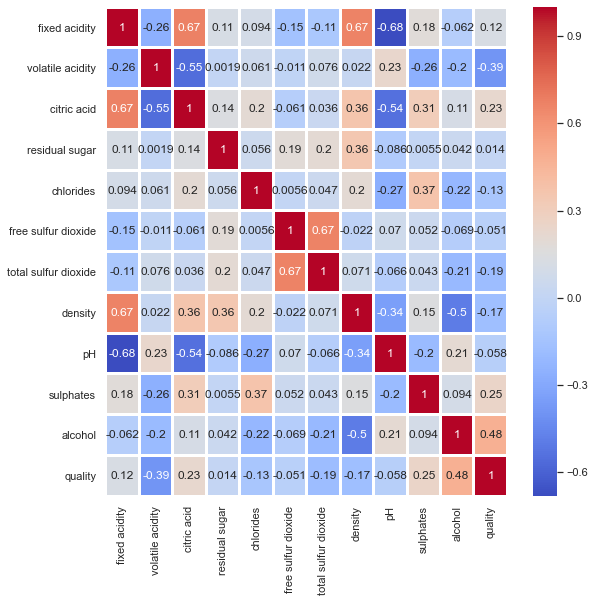

In [35]:
plt.figure(figsize = (9,9))
sns.heatmap(reddf.iloc[:, 0:12].corr(), linewidth=2, cmap='coolwarm',annot=True)

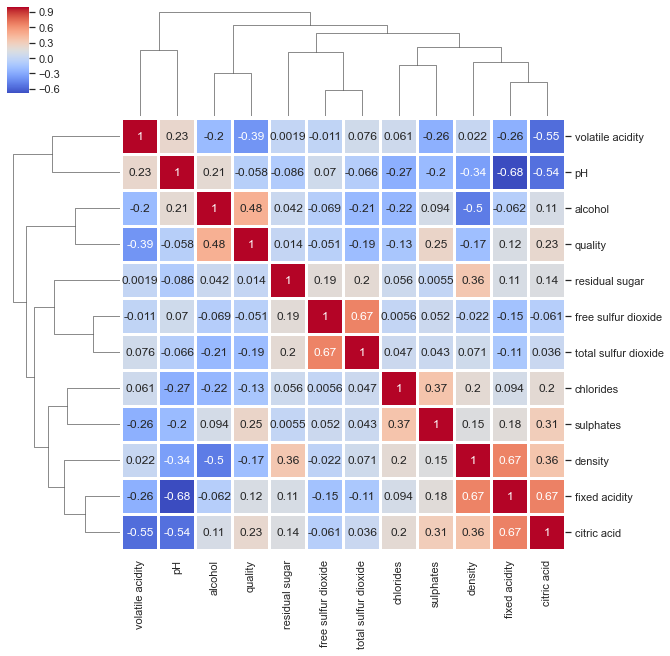

In [36]:
sns.clustermap(reddf.iloc[:, 0:12].corr(), linewidth=2, cmap='coolwarm', annot=True)

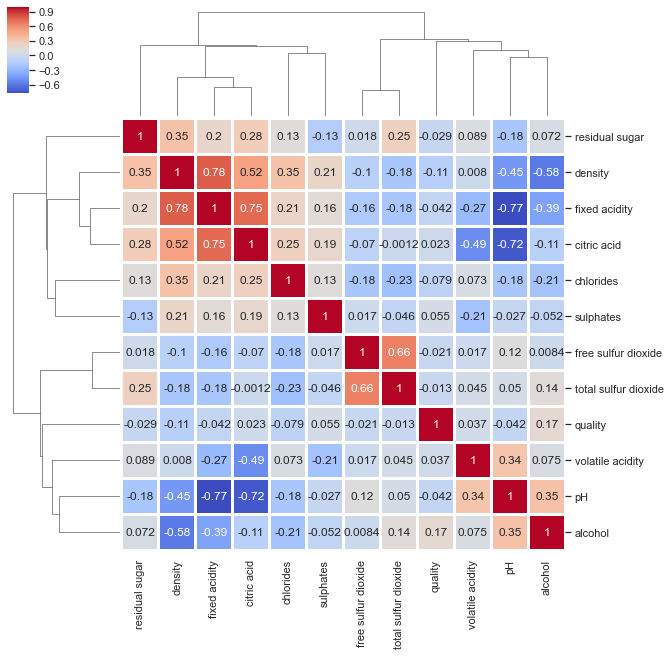

In [37]:
sns.clustermap(gooddata.iloc[:, 0:12].corr(), linewidth=2, cmap='coolwarm', annot=True)

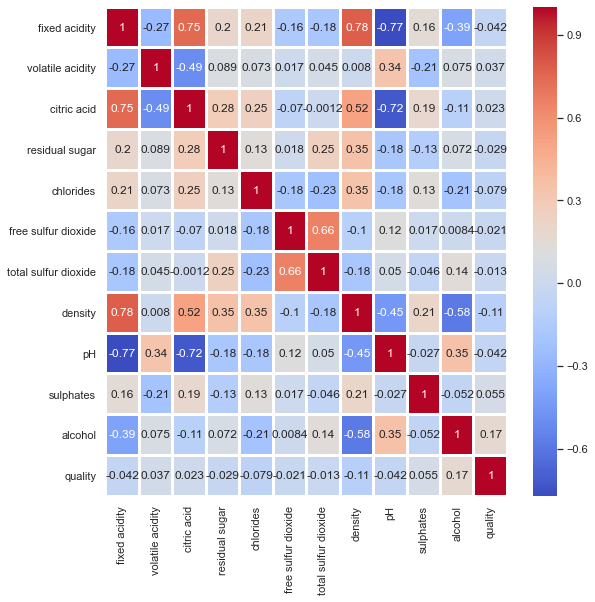

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(gooddata.iloc[:, 0:12].corr(),linewidth=2, cmap='coolwarm', annot=True )

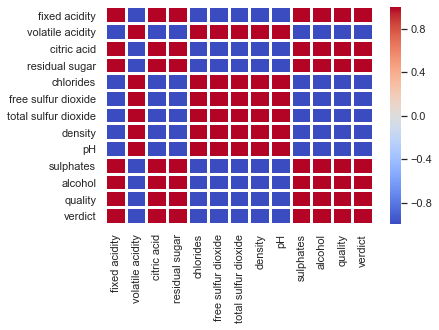

In [39]:
sns.heatmap(middf.corr(), linewidth=2, cmap='coolwarm',)

In [40]:
middf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.13571
1,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.00000


In [41]:
mergedf = pd.concat([newdf, olddf])
mergedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,verdict
0,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.00000
1,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949,1.00000
2,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.00000
0,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.00000
1,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.13571
2,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.00000


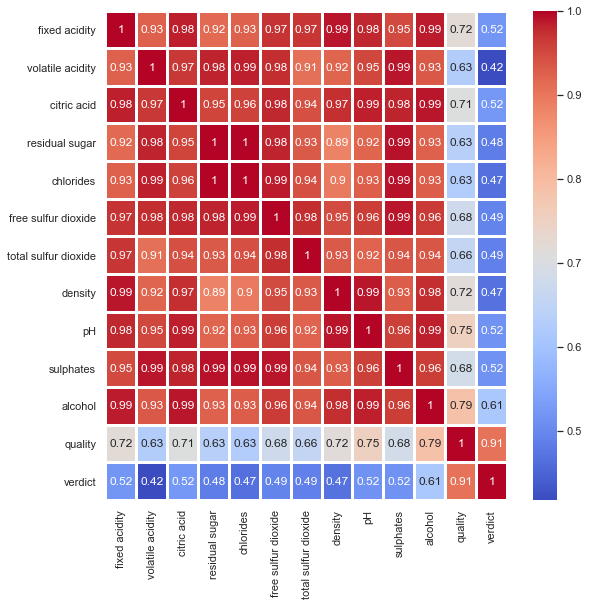

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(mergedf.corr(), linewidth=2, cmap='coolwarm', annot=True)

# Notes From Data Exploration and Visualisation

1) No obvious relationship between listed wine properties and their quality value

*Slight inverse relationship with quality: volatile acidity, *Minor: total suplhur dioxide, density.
    
*Slight direct relationship with quality: alcholol, *Minor: sulphates, citric acid.

most obvious relationship: alcohol(direct)

2) Classes are indeed ordered but unbalanced

greater than 75 percent of the tested samples had a quality value of 6 or less which is less than 6.5

3) No missing or Nan Values

4) All the columns contain only numerical data types

5) No negative values was present in any column
All the values in the data frames are all positive


# Data Preprocessing

In [43]:
# Examining the Projects purpose
# To determine which physicochemical properties make red wine 'good!' by using some machine learning techniques
# Our project falls under an imbalanced classifcation problem
# we would require a specialized sampling technique

In [44]:
reddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
verdict                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [79]:
# Preparing the data set

X = reddf.iloc[:, :-2].values
y = reddf.iloc[:, 11].values
z = reddf.iloc[:, 12].values

X.shape

(1599, 11)

# Split the Data into Training and Test Data

In [80]:
# There are no missing data in the dataset
# There is no categorical data present in the dataset
# So the next thing for us to do is to split the dataset into training data and test data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=21)
X_train2, X_test2, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=21)

print(X_train.shape, y_train.shape)
print(X_train2.shape, z_train.shape)

(1279, 11) (1279,)
(1279, 11) (1279,)


# Applying SMOTE Oversampling

In [47]:
# The dataset is imbalanced
# To solve this problem since the dataset is relatively small(1599 samples),
# we would employ oversampling to improve the model

# SMOTE Technique
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
smote2 = SMOTE()

X_train, y_train = smote.fit_sample(X_train, y_train)
X_train2, z_train = smote2.fit_sample(X_train2, z_train)

print(X_train.shape, y_train.shape)
print(X_train2.shape, z_train.shape)

Using TensorFlow backend.


(1824, 11) (1824,)
(2214, 11) (2214,)


# Feature Scaling

In [48]:
# Next we carry out Feature Scaling
# We need to put all columns values in the same scale to derive accurate result from our model
# The 2 types of feature scaling are standardisation and normalization,  we use standardization

scale_X = preprocessing.StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

scale_X2 = preprocessing.StandardScaler()
X_train2 = scale_X2.fit_transform(X_train2)
X_test2 = scale_X2.transform(X_test2)

print(X_train.shape, y_train.shape)
print(X_train2.shape, z_train.shape)

(1824, 11) (1824,)
(2214, 11) (2214,)


# Models

In [49]:
# our problem is a MultiClass classification problem with Imbalanced Dataset
# We would try to solve the problem using 5 different algorithms while observing the acurracy and the F1 scores
# These include
# Logistic regression
# Support Vector machines- Linear SVC
# Support Vector machines - SVC
# Random Forest
# Decision Trees

# note that we are focusing on evaluating feature importance not predicting an outcome

### Logistic Regression

In [50]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lmodel = LogisticRegression(max_iter=5000, C=1.2, class_weight=None, intercept_scaling=0.9)

lmodel.fit(X_train2, z_train)
pred = lmodel.predict(X_test2)
print('Logistic Regression Accuracy Score: ', accuracy_score(z_test, pred))
print('\nLogistic Regression F1 Score: ', f1_score(z_test, pred, average='weighted'))
print(confusion_matrix(z_test, pred))
print('\nLogistic Regression Mean Absolute Error score: ', mean_absolute_error(z_test, pred))
print(classification_report(z_test, pred))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, lmodel.coef_.T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))


Logistic Regression Accuracy Score:  0.796875

Logistic Regression F1 Score:  0.8216790429042904
[[220  55]
 [ 10  35]]

Logistic Regression Mean Absolute Error score:  0.203125
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       275
           1       0.39      0.78      0.52        45

    accuracy                           0.80       320
   macro avg       0.67      0.79      0.69       320
weighted avg       0.88      0.80      0.82       320

                 Feature  Importance
10               alcohol    0.952050
0          fixed acidity    0.757534
9              sulphates    0.750385
3         residual sugar    0.441261
5    free sulfur dioxide    0.278854
8                     pH    0.098980
2            citric acid    0.087807
4              chlorides   -0.373534
1       volatile acidity   -0.568682
6   total sulfur dioxide   -0.728906
7                density   -0.766570


Text(0.5, 1.0, 'Confusion matrix')

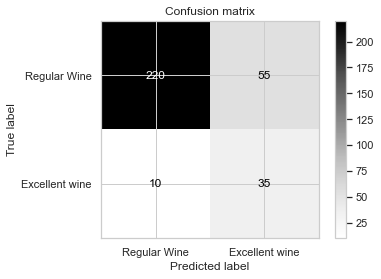

In [51]:
# Plotting Confusion Matric
plot1 = plot_confusion_matrix(lmodel, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot1.ax_.set_title('Confusion matrix')

In [52]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lmodelx = LogisticRegression(C=10, intercept_scaling=0.1, max_iter=5000)

lmodelx.fit(X_train, y_train)
predx = lmodelx.predict(X_test)
print('Logistic Regression Accuracy Score: ', accuracy_score(y_test, predx))
print('\nLogistic Regression F1 Score: ', f1_score(y_test, predx, average='weighted'))
print(confusion_matrix(y_test, predx))
print('\nLogistic Regression Mean Absolute Error score: ', mean_absolute_error(y_test, predx))
print(classification_report(y_test, predx))

count = []
for x in lmodelx.coef_.T:
    y = sum(abs(x))
    count.append([y/6])
count = np.array(count)
print(count.shape)
feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, count)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))


Logistic Regression Accuracy Score:  0.54375

Logistic Regression F1 Score:  0.5344174034576004
[[ 0  0  0  1  0  0]
 [ 5  0  6  4  1  0]
 [ 9  0 88 29  1  0]
 [ 2  0 48 72  9  0]
 [ 0  0  1 27 14  0]
 [ 0  0  0  1  2  0]]

Logistic Regression Mean Absolute Error score:  0.53125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.62      0.69      0.65       127
           6       0.54      0.55      0.54       131
           7       0.52      0.33      0.41        42
           8       0.00      0.00      0.00         3

    accuracy                           0.54       320
   macro avg       0.28      0.26      0.27       320
weighted avg       0.53      0.54      0.53       320

(11, 1)
                 Feature  Importance
1       volatile acidity    1.629018
10               alcohol    1.124537
6   total sulfur dioxide    0.862182
2            citric a

Text(0.5, 1.0, 'Confusion matrix')

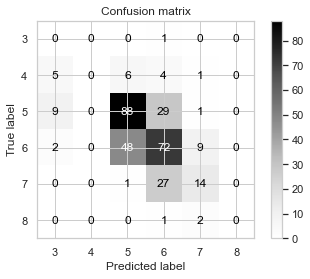

In [53]:
# Plotting Confusion Matric
plot2 = plot_confusion_matrix(lmodelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot2.ax_.set_title('Confusion matrix')


### Support Vector Machine - Linear SVC

In [54]:
# Support Vector Machine - LinearSVC

from sklearn.svm import LinearSVC


svcmodel = LinearSVC(max_iter=50000, C=1.2, class_weight=None, intercept_scaling=0.9)

svcmodel.fit(X_train2, z_train)

pred2 = svcmodel.predict(X_test2)

print('Linear SVC Accuracy Score: ', accuracy_score(z_test, pred2))
print('\nLinear SVC F1 Score: ', f1_score(z_test, pred2, average='weighted'),)
print(confusion_matrix(z_test, pred2))
print('\nLinear SVC Mean Absolute Error score: ', mean_absolute_error(z_test, pred2))
print(classification_report(z_test, pred2))


feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, svcmodel.coef_.T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))

Linear SVC Accuracy Score:  0.796875

Linear SVC F1 Score:  0.8222276741013772
[[219  56]
 [  9  36]]

Linear SVC Mean Absolute Error score:  0.203125
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       275
           1       0.39      0.80      0.53        45

    accuracy                           0.80       320
   macro avg       0.68      0.80      0.70       320
weighted avg       0.88      0.80      0.82       320

                 Feature  Importance
10               alcohol    0.307770
0          fixed acidity    0.271235
9              sulphates    0.253873
3         residual sugar    0.141122
5    free sulfur dioxide    0.099076
2            citric acid    0.055505
8                     pH    0.038559
4              chlorides   -0.130255
1       volatile acidity   -0.183503
6   total sulfur dioxide   -0.252264
7                density   -0.283656


Text(0.5, 1.0, 'Confusion matrix')

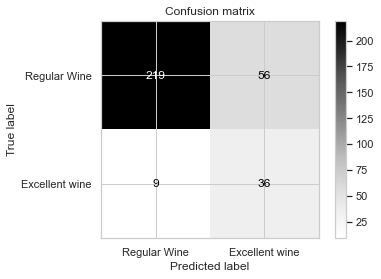

In [55]:
# Plotting Confusion Matric
plot3 = plot_confusion_matrix(svcmodel, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot3.ax_.set_title('Confusion matrix')

In [56]:
# Simple Vector Machine

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


svcmodelx = LinearSVC(C=10, intercept_scaling=0.1, max_iter=50000)

svcmodelx.fit(X_train, y_train)

pred2x = svcmodelx.predict(X_test2)

print('Linear SVC Accuracy Score: ', accuracy_score(y_test, pred2x))
print('\nLinear SVC F1 Score: ', f1_score(y_test, pred2x, average='weighted'),)
print(confusion_matrix(y_test, pred2x))
print('\nLinear SVC Mean Absolute Error score: ', mean_absolute_error(y_test, pred2x))
print(classification_report(y_test, pred2x))


count = []
for x in svcmodelx.coef_.T:
    y = sum(abs(x))
    count.append([y/6])
count = np.array(count)
print(count.shape)
feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, count)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))

Linear SVC Accuracy Score:  0.3

Linear SVC F1 Score:  0.34429452812688593
[[ 1  0  0  0  0  0]
 [14  0  1  1  0  0]
 [62  0 58  6  1  0]
 [49  0 46 36  0  0]
 [ 7  0  7 27  1  0]
 [ 0  0  0  1  2  0]]

Linear SVC Mean Absolute Error score:  1.296875
              precision    recall  f1-score   support

           3       0.01      1.00      0.01         1
           4       0.00      0.00      0.00        16
           5       0.52      0.46      0.49       127
           6       0.51      0.27      0.36       131
           7       0.25      0.02      0.04        42
           8       0.00      0.00      0.00         3

    accuracy                           0.30       320
   macro avg       0.21      0.29      0.15       320
weighted avg       0.45      0.30      0.34       320

(11, 1)
                 Feature  Importance
1       volatile acidity    0.380179
6   total sulfur dioxide    0.259093
10               alcohol    0.213823
2            citric acid    0.158579
7            

Text(0.5, 1.0, 'Confusion matrix')

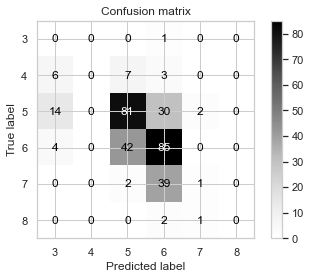

In [57]:
# Plotting Confusion Matric
plot4 = plot_confusion_matrix(svcmodelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot4.ax_.set_title('Confusion matrix')


### Support Vector Machine - SVC

In [58]:
from sklearn.svm import SVC

svc_model = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf')

svc_model.fit(X_train2, z_train)

pred9 = svc_model.predict(X_test2)

print('sSVC Accuracy Score: ', accuracy_score(z_test, pred9))
print('\nSVC F1 Score: ', f1_score(z_test, pred9, average='weighted'),)
print('\nSVC Mean Absolute Error score: ', mean_absolute_error(z_test, pred9))
print(classification_report(z_test, pred9))


sSVC Accuracy Score:  0.921875

SVC F1 Score:  0.9222331061470406

SVC Mean Absolute Error score:  0.078125
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       275
           1       0.72      0.73      0.73        45

    accuracy                           0.92       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.92      0.92      0.92       320



Text(0.5, 1.0, 'Confusion matrix')

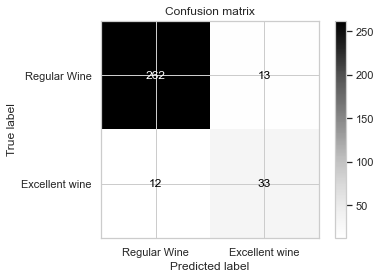

In [59]:
# Plotting Confusion Matric
plot5 = plot_confusion_matrix(svc_model, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot5.ax_.set_title('Confusion matrix')

In [60]:
svc_modelx = SVC(C=100, gamma=0.01, max_iter=50000, kernel='linear')

svc_modelx.fit(X_train, y_train)

pred9x = svc_modelx.predict(X_test)

print('SVC Accuracy Score: ', accuracy_score(y_test, pred9x))
print('\nSVC F1 Score: ', f1_score(y_test, pred9x, average='weighted'),)
print('\nSVC Mean Absolute Error score: ', mean_absolute_error(y_test, pred9x))
print(classification_report(y_test, pred9x))


count = []
for x in svc_modelx.coef_.T:
    y = sum(abs(x))
    count.append([y/6])
count = np.array(count)
print(count.shape)
feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, count)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))

SVC Accuracy Score:  0.5125

SVC F1 Score:  0.4892129637976644

SVC Mean Absolute Error score:  0.55625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.61      0.60      0.60       127
           6       0.50      0.64      0.56       131
           7       0.36      0.10      0.15        42
           8       0.00      0.00      0.00         3

    accuracy                           0.51       320
   macro avg       0.25      0.22      0.22       320
weighted avg       0.49      0.51      0.49       320

(11, 1)
                 Feature  Importance
1       volatile acidity    3.980618
10               alcohol    3.379588
6   total sulfur dioxide    2.700377
8                     pH    1.909440
2            citric acid    1.854134
7                density    1.845395
9              sulphates    1.637483
0          fixed acidity    1.363065
3         re

Text(0.5, 1.0, 'Confusion matrix')

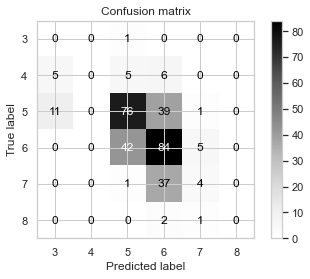

In [61]:
# Plotting Confusion Matric
plot6 = plot_confusion_matrix(svc_modelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot6.ax_.set_title('Confusion matrix')


### Random Forest Classifier

In [62]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators=100)

rfmodel.fit(X_train2, z_train)

pred3 = rfmodel.predict(X_test2)

print('Random Forest Classifier Accuracy Score: ', accuracy_score(z_test, pred3))
print('\nRandom Forest Classifier F1 Score: ', f1_score(z_test, pred3, average='weighted'),)
print('\nRandom Forest Classifier Mean Absolute Error score: ', mean_absolute_error(z_test, pred3))
print(classification_report(z_test, pred3))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, np.array([rfmodel.feature_importances_]).T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))



Random Forest Classifier Accuracy Score:  0.890625

Random Forest Classifier F1 Score:  0.898800324426506

Random Forest Classifier Mean Absolute Error score:  0.109375
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       275
           1       0.58      0.84      0.68        45

    accuracy                           0.89       320
   macro avg       0.77      0.87      0.81       320
weighted avg       0.92      0.89      0.90       320

                 Feature  Importance
10               alcohol    0.237896
9              sulphates    0.155483
1       volatile acidity    0.119658
2            citric acid    0.083438
7                density    0.070195
6   total sulfur dioxide    0.067840
0          fixed acidity    0.064609
4              chlorides    0.057341
3         residual sugar    0.049879
8                     pH    0.047147
5    free sulfur dioxide    0.046517


Text(0.5, 1.0, 'Confusion matrix')

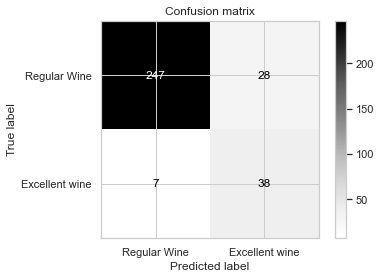

In [63]:
# Plotting Confusion Matric
plot7 = plot_confusion_matrix(rfmodel, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot7.ax_.set_title('Confusion matrix')

In [72]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfmodelx = RandomForestClassifier(n_estimators=100, max_features='log2', min_samples_split=4)

rfmodelx.fit(X_train, y_train)

pred3x = rfmodelx.predict(X_test)

print('Random Forest Classifier Accuracy Score: ', accuracy_score(y_test, pred3x))
print('\nRandom Forest Classifier F1 Score: ', f1_score(y_test, pred3x, average='weighted'))
print('\nRandom Forest Classifier Mean Absolute Error score: ', mean_absolute_error(y_test, pred3x))
print(classification_report(y_test, pred3x))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, np.array([rfmodelx.feature_importances_]).T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))



Random Forest Classifier Accuracy Score:  0.7

Random Forest Classifier F1 Score:  0.6811975142669007

Random Forest Classifier Mean Absolute Error score:  0.328125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.73      0.83      0.78       127
           6       0.68      0.71      0.69       131
           7       0.73      0.57      0.64        42
           8       0.50      0.33      0.40         3

    accuracy                           0.70       320
   macro avg       0.44      0.41      0.42       320
weighted avg       0.67      0.70      0.68       320

                 Feature  Importance
1       volatile acidity    0.198403
6   total sulfur dioxide    0.117014
10               alcohol    0.115041
9              sulphates    0.098076
4              chlorides    0.091599
5    free sulfur dioxide    0.085632
7                density    0.066

Text(0.5, 1.0, 'Confusion matrix')

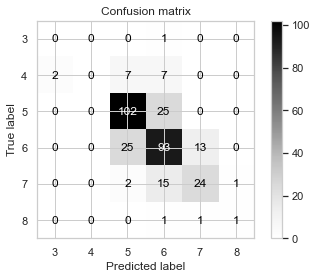

In [65]:
# Plotting Confusion Matric
plot8 = plot_confusion_matrix(rfmodelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot8.ax_.set_title('Confusion matrix')


### Decision Tree

In [66]:
# Decision  Tree

from sklearn.tree import DecisionTreeClassifier

trmodel = DecisionTreeClassifier(class_weight=None)

trmodel.fit(X_train2, z_train)

pred5 = trmodel.predict(X_test2)

print('DecisionTreeClassifier Accuracy Score: ', accuracy_score(z_test, pred5))
print('\nDecisionTreeClassifier F1 Score: ', f1_score(z_test, pred5, average='micro'))
print('\nnDecisionTreeClassifier Mean Absolute Error score: ', mean_absolute_error(z_test, pred5))
print(classification_report(z_test, pred5))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, np.array([trmodel.feature_importances_]).T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))



DecisionTreeClassifier Accuracy Score:  0.85625

DecisionTreeClassifier F1 Score:  0.85625

nDecisionTreeClassifier Mean Absolute Error score:  0.14375
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       275
           1       0.49      0.80      0.61        45

    accuracy                           0.86       320
   macro avg       0.73      0.83      0.76       320
weighted avg       0.90      0.86      0.87       320

                 Feature  Importance
10               alcohol    0.398603
9              sulphates    0.129918
1       volatile acidity    0.096322
0          fixed acidity    0.072203
6   total sulfur dioxide    0.065102
3         residual sugar    0.050072
7                density    0.047166
2            citric acid    0.041403
5    free sulfur dioxide    0.039826
4              chlorides    0.035456
8                     pH    0.023929


Text(0.5, 1.0, 'Confusion matrix')

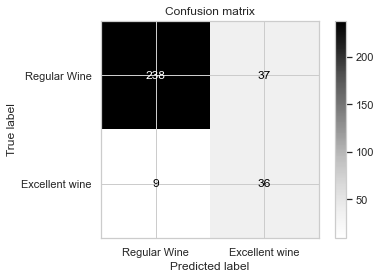

In [67]:
# Plotting Confusion Matric
plot9 = plot_confusion_matrix(trmodel, X_test2, z_test, display_labels=['Regular Wine', 'Excellent wine'], cmap='Greys')

plot9.ax_.set_title('Confusion matrix')

In [68]:
from sklearn.tree import DecisionTreeClassifier

trmodelx = DecisionTreeClassifier(criterion='entropy', max_features='sqrt',class_weight=None)

trmodelx.fit(X_train, y_train)

pred5x = trmodelx.predict(X_test)

print('DecisionTreeClassifier Accuracy Score: ', accuracy_score(y_test, pred5x))
print('\nDecisionTreeClassifier F1 Score: ', f1_score(y_test, pred5x, average='micro'))
print('\nDecisionTreeClassifier Mean Absolute Error score: ', mean_absolute_error(y_test, pred5x))
print(classification_report(y_test, pred5x))

feature_importance = pd.DataFrame(np.hstack((np.array([list(reddf.columns)[0:-2]]).T, np.array([trmodelx.feature_importances_]).T)), 
                                  columns=['Feature', 'Importance'])

feature_importance['Importance'] = pd.to_numeric(feature_importance['Importance'])

print(feature_importance.sort_values(by='Importance', ascending=False))



DecisionTreeClassifier Accuracy Score:  0.590625

DecisionTreeClassifier F1 Score:  0.590625

DecisionTreeClassifier Mean Absolute Error score:  0.475
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.68      0.68      0.68       127
           6       0.59      0.59      0.59       131
           7       0.52      0.60      0.56        42
           8       0.20      0.33      0.25         3

    accuracy                           0.59       320
   macro avg       0.33      0.37      0.35       320
weighted avg       0.58      0.59      0.59       320

                 Feature  Importance
1       volatile acidity    0.239835
5    free sulfur dioxide    0.151838
4              chlorides    0.094993
9              sulphates    0.091971
10               alcohol    0.076089
8                     pH    0.065128
0          fixed acidity    0.059641
7         

Text(0.5, 1.0, 'Confusion matrix')

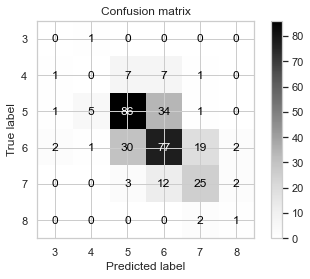

In [69]:
# Plotting Confusion Matric
plot10 = plot_confusion_matrix(trmodelx, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot10.ax_.set_title('Confusion matrix')


In [70]:
# From our models above, high values of Alcohol as well Low values of Volatile acidity end up giving substancial points towards
# that wine sample being classified as good
# are the 3 major determining factors of whether red wine is good or not
# There is an obvious connection between volatile acidity and fixed acidity

# if we did feature selection on our model, only 6 features would be choosen and 
# the accuracy results improvement on the model wont be substancial 

# Improving our models accuracy

### GridSearch CV

In [75]:
# with GridSearch CV for the original dataset

# logistic Regression

from sklearn.model_selection import GridSearchCV

param = {'C': [0.1, 1, 10],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'intercept_scaling': [0.1, 1, 10],
         'fit_intercept': [True, False]}

gridlr = GridSearchCV(lmodelx, param_grid=param, verbose=3, cv=10)

gridlr.fit(X_train, y_train)

print(gridlr.best_params_)
print('\n')
print(gridlr.best_estimator_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.683, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.683, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.672, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.678, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.665, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.725, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.654, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.648, total=   0.1s
[CV] C=0.1, fit_intercept=Tru

[CV]  C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.672, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.678, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.665, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.725, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.654, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.648, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=1

[CV]  C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.672, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.678, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.665, total=   0.0s
[CV] C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.725, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.654, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.648, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercep

[CV]  C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.637, total=   0.1s
[CV] C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.698, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.615, total=   0.1s
[CV] C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.637, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.703, total=   0.1s
[CV] C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.610, total=   0.1s
[CV] C=0.1, fit_in

[CV]  C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.678, total=   0.1s
[CV] C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.637, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.698, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.615, total=   0.1s
[CV] C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.637, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.703, total=   0.1s
[CV] C=0.1, fit_intercept=False, interce

[CV]  C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.637, total=   0.1s
[CV] C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.698, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.615, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.637, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.703, total=   0.0s
[CV] C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=0.1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.610, total=   0.1s
[CV] C=0.1, fit_intercept=Fal

[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.694, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.703, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.736, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.676, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.692, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.714, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1

[CV]  C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.694, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg ..
[CV]  C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.703, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg ..
[CV]  C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.736, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg ..
[CV]  C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.676, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg ..
[CV]  C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.692, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg ..
[CV]  C=1, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.714, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=1, solver=newto

[CV]  C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.694, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg .
[CV]  C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.703, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg .
[CV]  C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.736, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg .
[CV]  C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.676, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg .
[CV]  C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.692, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg .
[CV]  C=1, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.714, total=   0.1s
[CV] C=1, fit_intercept=True, intercept_scaling=10, solve

[CV]  C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.678, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.643, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.698, total=   0.0s
[CV] C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.604, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.637, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.687, total=   0.1s
[CV] C=1, fit_intercept=False, intercept

[CV]  C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.643, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg .
[CV]  C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.698, total=   0.0s
[CV] C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg .
[CV]  C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.604, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg .
[CV]  C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.637, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg .
[CV]  C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.687, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg .
[CV]  C=1, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.588, total=   0.0s
[CV] C=1, fit_intercept=False, intercept_scaling=1, solve

[CV]  C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.698, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.604, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.637, total=   0.0s
[CV] C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.687, total=   0.0s
[CV] C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=1, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.588, total=   0.1s
[CV] C=1, fit_intercept=False, intercept_scaling=10, solver=lbfgs ....
[CV]  C=1, fit_intercept=False, intercept_scaling=10, solver=lbfgs, score=0.656, total=   0.0s
[CV] C=1, fit_intercept=False, intercept_scaling=10, so

[CV]  C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.731, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.681, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.692, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.714, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=10, fit_intercept=True, intercept_scaling=0.1, solver=newton-cg, score=0.648, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=0.1, solver=lbfgs ...
[CV]  C=10, fit_intercept=True, intercept_scaling=0.1, solver=lbfgs, score=0.699, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scal

[CV]  C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.698, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg .
[CV]  C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.731, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg .
[CV]  C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.681, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg .
[CV]  C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.692, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg .
[CV]  C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.714, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg .
[CV]  C=10, fit_intercept=True, intercept_scaling=1, solver=newton-cg, score=0.648, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=1, solve

[CV]  C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.731, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.681, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.692, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.714, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg 
[CV]  C=10, fit_intercept=True, intercept_scaling=10, solver=newton-cg, score=0.648, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=10, solver=lbfgs ....
[CV]  C=10, fit_intercept=True, intercept_scaling=10, solver=lbfgs, score=0.699, total=   0.1s
[CV] C=10, fit_intercept=True, intercept_scaling=10, so

[CV]  C=10, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.643, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=10, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.681, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg 
[CV]  C=10, fit_intercept=False, intercept_scaling=0.1, solver=newton-cg, score=0.593, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=0.1, solver=lbfgs ..
[CV]  C=10, fit_intercept=False, intercept_scaling=0.1, solver=lbfgs, score=0.656, total=   0.0s
[CV] C=10, fit_intercept=False, intercept_scaling=0.1, solver=lbfgs ..
[CV]  C=10, fit_intercept=False, intercept_scaling=0.1, solver=lbfgs, score=0.634, total=   0.0s
[CV] C=10, fit_intercept=False, intercept_scaling=0.1, solver=lbfgs ..
[CV]  C=10, fit_intercept=False, intercept_scaling=0.1, solver=lbfgs, score=0.645, total=   0.0s
[CV] C=10, fit_intercept=False, intercept_scali

[CV]  C=10, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.604, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=1, solver=newton-cg 
[CV]  C=10, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.643, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=1, solver=newton-cg 
[CV]  C=10, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.681, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=1, solver=newton-cg 
[CV]  C=10, fit_intercept=False, intercept_scaling=1, solver=newton-cg, score=0.593, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=1, solver=lbfgs ....
[CV]  C=10, fit_intercept=False, intercept_scaling=1, solver=lbfgs, score=0.656, total=   0.0s
[CV] C=10, fit_intercept=False, intercept_scaling=1, solver=lbfgs ....
[CV]  C=10, fit_intercept=False, intercept_scaling=1, solver=lbfgs, score=0.634, total=   0.0s
[CV] C=10, fit_intercept=False, intercept_scaling=1, solver

[CV]  C=10, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.604, total=   0.0s
[CV] C=10, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=10, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.643, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=10, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.681, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=10, solver=newton-cg 
[CV]  C=10, fit_intercept=False, intercept_scaling=10, solver=newton-cg, score=0.593, total=   0.1s
[CV] C=10, fit_intercept=False, intercept_scaling=10, solver=lbfgs ...
[CV]  C=10, fit_intercept=False, intercept_scaling=10, solver=lbfgs, score=0.656, total=   0.0s
[CV] C=10, fit_intercept=False, intercept_scaling=10, solver=lbfgs ...
[CV]  C=10, fit_intercept=False, intercept_scaling=10, solver=lbfgs, score=0.634, total=   0.0s
[CV] C=10, fit_intercept=False, intercept_scaling=

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  1.1min finished


{'C': 10, 'fit_intercept': True, 'intercept_scaling': 0.1, 'solver': 'sag'}


LogisticRegression(C=10, intercept_scaling=0.1, max_iter=5000, solver='sag')


In [76]:
# linear SVC

from sklearn.model_selection import GridSearchCV

param = {'C': [0.1, 1, 10],
         'intercept_scaling': [0.1, 1, 10],
         'fit_intercept': [True, False]}

gridls = GridSearchCV(svcmodelx, param_grid=param, verbose=3, cv=10)

gridls.fit(X_train, y_train)

print(gridls.best_params_)
print('\n')
print(gridls.best_estimator_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.678, total=   0.2s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.645, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.650, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.683, total=   0.2s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.659, total=   0.1s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.709, total=   0.2s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.610, total=   0.2s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.654, total=   0.2s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.676, total=   0.2s
[CV] C=0.1, fit_intercept=True, intercept_scaling=0.1 ................
[CV]  C=0.1, fit_intercept=True, intercept_scaling=0.1, score=0.621, total= 

[CV]  C=0.1, fit_intercept=False, intercept_scaling=10, score=0.676, total=   0.2s
[CV] C=0.1, fit_intercept=False, intercept_scaling=10 ................
[CV]  C=0.1, fit_intercept=False, intercept_scaling=10, score=0.643, total=   0.2s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1 ..................
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, score=0.689, total=   1.6s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1 ..................
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, score=0.678, total=   1.7s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1 ..................
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, score=0.661, total=   1.7s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1 ..................
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, score=0.689, total=   1.6s
[CV] C=1, fit_intercept=True, intercept_scaling=0.1 ..................
[CV]  C=1, fit_intercept=True, intercept_scaling=0.1, score=0.670, total=   0.9s
[CV

[CV]  C=1, fit_intercept=False, intercept_scaling=10, score=0.694, total=   2.6s
[CV] C=1, fit_intercept=False, intercept_scaling=10 ..................
[CV]  C=1, fit_intercept=False, intercept_scaling=10, score=0.643, total=   1.4s
[CV] C=1, fit_intercept=False, intercept_scaling=10 ..................
[CV]  C=1, fit_intercept=False, intercept_scaling=10, score=0.687, total=   2.1s
[CV] C=1, fit_intercept=False, intercept_scaling=10 ..................
[CV]  C=1, fit_intercept=False, intercept_scaling=10, score=0.593, total=   2.1s
[CV] C=1, fit_intercept=False, intercept_scaling=10 ..................
[CV]  C=1, fit_intercept=False, intercept_scaling=10, score=0.621, total=   1.9s
[CV] C=1, fit_intercept=False, intercept_scaling=10 ..................
[CV]  C=1, fit_intercept=False, intercept_scaling=10, score=0.676, total=   2.3s
[CV] C=1, fit_intercept=False, intercept_scaling=10 ..................
[CV]  C=1, fit_intercept=False, intercept_scaling=10, score=0.637, total=   2.3s
[CV] C=

[CV]  C=10, fit_intercept=False, intercept_scaling=1, score=0.621, total=  20.4s
[CV] C=10, fit_intercept=False, intercept_scaling=1 ..................
[CV]  C=10, fit_intercept=False, intercept_scaling=1, score=0.676, total=  20.3s
[CV] C=10, fit_intercept=False, intercept_scaling=1 ..................
[CV]  C=10, fit_intercept=False, intercept_scaling=1, score=0.637, total=  21.3s
[CV] C=10, fit_intercept=False, intercept_scaling=10 .................
[CV]  C=10, fit_intercept=False, intercept_scaling=10, score=0.639, total=  21.1s
[CV] C=10, fit_intercept=False, intercept_scaling=10 .................
[CV]  C=10, fit_intercept=False, intercept_scaling=10, score=0.672, total=  20.8s
[CV] C=10, fit_intercept=False, intercept_scaling=10 .................
[CV]  C=10, fit_intercept=False, intercept_scaling=10, score=0.656, total=  20.4s
[CV] C=10, fit_intercept=False, intercept_scaling=10 .................
[CV]  C=10, fit_intercept=False, intercept_scaling=10, score=0.694, total=  20.3s
[CV

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 18.8min finished


{'C': 10, 'fit_intercept': True, 'intercept_scaling': 10}


LinearSVC(C=10, intercept_scaling=10, max_iter=50000)


In [80]:
gridls.best_score_

0.6808953341740228

In [77]:
# SVC

param = {'C': [0.1, 1, 10],
         'gamma': [0.1, 1, 10]}

gridsvc = GridSearchCV(svc_modelx, param_grid=param, verbose=3, cv=10)

gridsvc.fit(X_train, y_train)

print(gridsvc.best_params_)
print('\n')
print(gridsvc.best_estimator_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.710, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.661, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.656, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.683, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.742, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.670, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.676, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.725, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ..................... C=10, gamma=0.1, score=0.727, total=   0.3s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.689, total=   0.3s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.672, total=   0.3s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.699, total=   0.3s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.698, total=   0.2s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.742, total=   0.3s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.676, total=   0.3s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.7s finished


{'C': 10, 'gamma': 0.1}


SVC(C=10, gamma=0.1, kernel='linear')


In [153]:
# ## using grid search for Random Forest Classifier

from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100,150.300],
         'max_features': ['auto', 'log2', 'sqrt'],
         'bootstrap': [True, False],
         'min_samples_split': [2,4,6,8,10]}
estimator = RandomForestClassifier()

gridrf = GridSearchCV(estimator, params, verbose=3)
gridrf.fit(X_train, y_train)

print(gridrf.best_params_)
print(gridrf.best_estimator_)
print(gridrf.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50, score=0.756, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50, score=0.762, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50, score=0.811, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50, score=0.740, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50, score=0.747, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100, score=0.748, total=   0.4s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100, score=0.767, total=   0.5s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=

[CV]  bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=50, score=0.729, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=50, score=0.772, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=100, score=0.759, total=   0.3s
[CV] bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=100, score=0.748, total=   0.3s
[CV] bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=100, score=0.816, total=   0.4s
[CV] bootstrap=True, max_features=auto, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_split=8, n_estimator

[CV]  bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=50, score=0.737, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=50, score=0.742, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=100, score=0.775, total=   0.3s
[CV] bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=100, score=0.781, total=   0.3s
[CV] bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=100, score=0.800, total=   0.4s
[CV] bootstrap=True, max_features=log2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=True, max_features=log2, min_samples_split=4, n_estimator

[CV]  bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=50, score=0.718, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=50, score=0.736, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=100, score=0.759, total=   0.3s
[CV] bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=100, score=0.742, total=   0.3s
[CV] bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=100, score=0.803, total=   0.4s
[CV] bootstrap=True, max_features=log2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_features=log2, min_samples_split=10, 

[CV]  bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=50, score=0.732, total=   0.2s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=50 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=50, score=0.755, total=   0.2s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=100 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=100, score=0.762, total=   0.3s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=100 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=100, score=0.764, total=   0.3s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=100 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=100, score=0.808, total=   0.4s
[CV] bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimators=100 
[CV]  bootstrap=True, max_features=sqrt, min_samples_split=6, n_estimator

[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50, score=0.803, total=   0.2s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50, score=0.740, total=   0.2s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=50, score=0.758, total=   0.2s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=100, score=0.737, total=   0.4s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=100, score=0.751, total=   0.4s
[CV] bootstrap=False, max_features=auto, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_features=auto, min_samples_split=2, n_

[CV]  bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=50, score=0.770, total=   0.2s
[CV] bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=50, score=0.797, total=   0.2s
[CV] bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=50, score=0.737, total=   0.2s
[CV] bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=50, score=0.750, total=   0.2s
[CV] bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=100, score=0.753, total=   0.4s
[CV] bootstrap=False, max_features=auto, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=False, max_features=auto, min_samples_split=8, n_es

[CV]  bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50, score=0.745, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50, score=0.759, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50, score=0.797, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50, score=0.742, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=50, score=0.755, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=4, n_estimators=100 
[CV]  bootstrap=False, max_features=log2, min_samples_split=4, n_esti

[CV]  bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50, score=0.740, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50, score=0.759, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50, score=0.800, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50, score=0.748, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=50, score=0.755, total=   0.2s
[CV] bootstrap=False, max_features=log2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_features=log2, min_samples_split

[CV]  bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50, score=0.751, total=   0.2s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50, score=0.764, total=   0.2s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50, score=0.811, total=   0.2s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50, score=0.751, total=   0.2s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=50, score=0.764, total=   0.2s
[CV] bootstrap=False, max_features=sqrt, min_samples_split=6, n_estimators=100 
[CV]  bootstrap=False, max_features=sqrt, min_samples_split=6, n_esti

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.5min finished


{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 100}
RandomForestClassifier(max_features='log2', min_samples_split=4)
0.7730167093180792


In [145]:
## using grid search for Decision Tree

from sklearn.model_selection import GridSearchCV

params = {'criterion': ["gini", "entropy"],
         'max_features': ['auto', 'log2', 'sqrt'],
         'splitter': ["best", "random"]}
estimator = DecisionTreeClassifier()

griddt = GridSearchCV(estimator, params, verbose=3)
griddt.fit(X_train, y_train)

print(griddt.best_params_)
print(gridls.best_score_)
print(griddt.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.647, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.704, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.745, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.682, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=best ................
[CV]  criterion=gini, max_features=auto, splitter=best, score=0.692, total=   0.0s
[CV] criterion=gini, max_features=auto, splitter=random ..............
[CV]  criterion=gini, max_features=auto, splitter=random, score=0.688, total=   0.0s
[CV] criterio

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_features=auto, splitter=random, score=0.649, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=random ...........
[CV]  criterion=entropy, max_features=auto, splitter=random, score=0.718, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=random ...........
[CV]  criterion=entropy, max_features=auto, splitter=random, score=0.718, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=random ...........
[CV]  criterion=entropy, max_features=auto, splitter=random, score=0.710, total=   0.0s
[CV] criterion=entropy, max_features=auto, splitter=random ...........
[CV]  criterion=entropy, max_features=auto, splitter=random, score=0.706, total=   0.0s
[CV] criterion=entropy, max_features=log2, splitter=best .............
[CV]  criterion=entropy, max_features=log2, splitter=best, score=0.679, total=   0.0s
[CV] criterion=entropy, max_features=log2, splitter=best .............
[CV]  criterion=entropy, max_features=log2, spli

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


### Cross Validation

In [162]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Decision Tree
dt_val = cross_val_score(estimator=trmodel, X=X_train2, y=z_train, cv=10)
print(dt_val.mean(), '\n')

# Random Forest Classifier
rf_val = cross_val_score(estimator=rfmodel, X=X_train2, y=z_train, cv=10)
print(rf_val.mean(), '\n')

# Support Vector Machine - SVC
svc_val = cross_val_score(estimator=svc_model, X=X_train2, y=z_train, cv=10)
print(svc_val.mean(), '\n')

# Support Vector Machine - Linear SVC
lsvc_val = cross_val_score(estimator=svcmodel, X=X_train2, y=z_train, cv=10)
print(lsvc_val.mean(), '\n')

# Logistic Regression
lr_val = cross_val_score(estimator=lmodel, X=X_train2, y=z_train, cv=10)
print(lr_val.mean())

0.8898271574742163 

0.938579756226815 

0.9634136398842281 

0.809852839264604 

0.8107537401655049


In [163]:
# The support Vector machine - SVC model had the best cross validation score for the first dataset followed by
# The random forest model
# The decision tree model
# The logistic regression model and the 
# The support vector machine = Linear SVC model

In [164]:
# The support Vector machine - SVC model had the best accuracy score followed by
# The random forest model
# The decision tree model
# The logistic regression model and the 
# The support vector machine = Linear SVC model

In [165]:
# for the second dataset with the quality column being the output variable the random forest model performed best.


# Carrying out Random Forest analysis using PCA and pipeline

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe = Pipeline([('pca', PCA(n_components=6)),
                 ('rf', RandomForestClassifier(n_estimators=100, max_features='log2', min_samples_split=4))])

pipe.fit(X_train, y_train)

pcapred = pipe.predict(X_test)

print(pipe.score(X_train, y_train), pipe.score(X_test, y_test))

1.0 0.70625


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.70      0.83      0.76       127
           6       0.72      0.72      0.72       131
           7       0.78      0.60      0.68        42
           8       0.33      0.33      0.33         3

    accuracy                           0.71       320
   macro avg       0.42      0.41      0.41       320
weighted avg       0.68      0.71      0.69       320



[[  0   0   1   0   0   0]
 [  2   0  10   4   0   0]
 [  1   0 106  19   1   0]
 [  0   0  33  94   4   0]
 [  0   0   2  13  25   2]
 [  0   0   0   0   2   1]]


Text(0.5, 1.0, 'Confusion matrix')

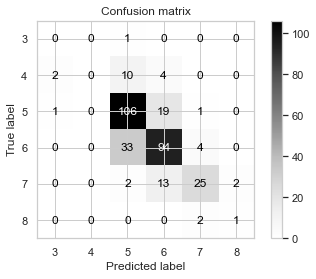

In [77]:
print(classification_report(y_test, pcapred))
print('\n')
print(confusion_matrix(y_test, pcapred))

plot77 = plot_confusion_matrix(pipe, X_test, y_test, display_labels=[3,4,5,6,7,8], cmap='Greys')

plot77.ax_.set_title('Confusion matrix')

### This model generated a .1 percent increase in accuracy compared to the last model

In [132]:
# PCA for feature ranking
from sklearn.preprocessing import StandardScaler

dfx = reddf.drop(['quality', 'verdict'], axis=1)

scaler = StandardScaler()
scaler.fit(dfx)
nw = scaler.transform(dfx)

pca = PCA(6)
pca.fit(nw)
X_pca = pca.transform(nw)

(1599, 6)


Text(0, 0.5, 'Second Principal Component')

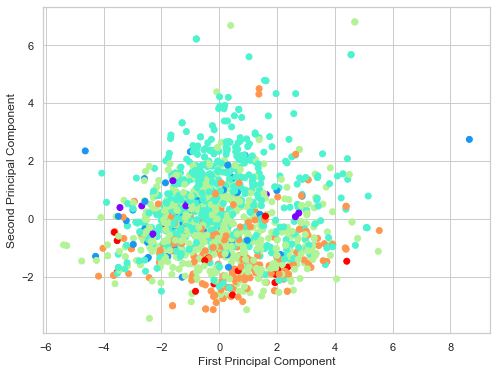

In [133]:

print(X_pca.shape)

plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:, 0], y= X_pca[:, 1], c=reddf['quality'], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



In [134]:
pca.components_

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323206],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [135]:
df_comb = pd.DataFrame(pca.components_, columns= dfx.columns)
df_comb

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645


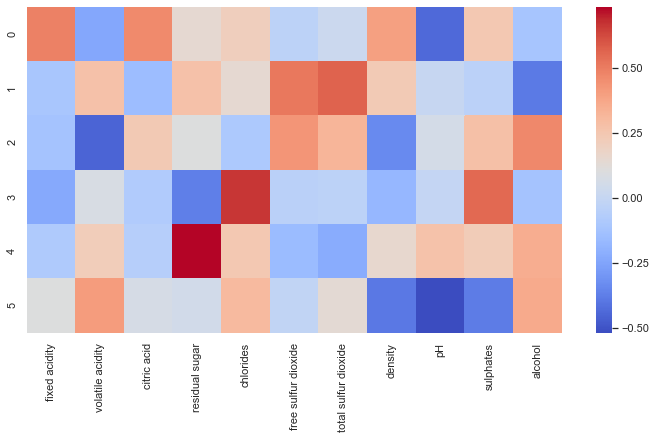

In [138]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comb, cmap='coolwarm')

### From the heatmap above the features that shows the strongest correlation to the pca are
- sulphates
- Alcohol
- Volatile Acidity
- chlorides
- total and free sulphur dioxide
- citric acid

# Summary

After careful evaluation of the dataset, visual plots and machine learning models, the six most influential physiochemical features that makes red wine good fall within:

    - Alcohol Percentage     (9.2 - 14.9)
    - Volatile Acidity       (0.12 - 0.915)
    - Sulphates              (0.39 - 2.00)
    - Total Sulfur dioxide   (6.0- 289.0)
    - Citric Acid            (0.0 - 1.00)
    - Chlorides              (0.012 - 0.358)

PH, Residual Sugars, Density and Fixed Acidity all have a large range across board so they won't really be helpful in pinpointing whether a wine is good or not.


Free Sulphur Dioxide is a subset of total sulphur dioxide.
    

#    THE END